In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import importers
import fbprophet
import sklearn
import cpi
import seaborn as sns

import prepare
import explore
#needed for matplotlib to handle plotting pandas
pd.plotting.register_matplotlib_converters()


INFO:cpi:Parsing data files from the BLS


### Acquire 

#### Coffee Data

We initially attempted to use ICO data to produce a model that would predict the global commodity coffee price. Very quickly, we found this question to be impossibly broad, and instead to focus on one country, Colombia.

ICO's data was insufficiently specific, and it only went back until 1990. We began searching for other data sources and ultimately found the National Federation of Coffee Growers of Colombia, commonly abbreviated FedCafe.

After some difficulty with the language barrier, we downloaded a few Excel files that detailed the export coffee prices for Excelso coffee. Excelso is a size grading of coffee which is the second largest bean. This is the most commonly exported Colombian coffee bean.

#### Weather Data

In [2]:
df = prepare.get_data()

### Prep

In [3]:
df2 = prepare.get_prepped()

### Exploration

After acquiring and cleaning the data we started to explore what our chosen features looked like over time for the top 13 coffee producing departments of Colombia. Initial exploration showed significant volatility in coffee production and precipitation. 

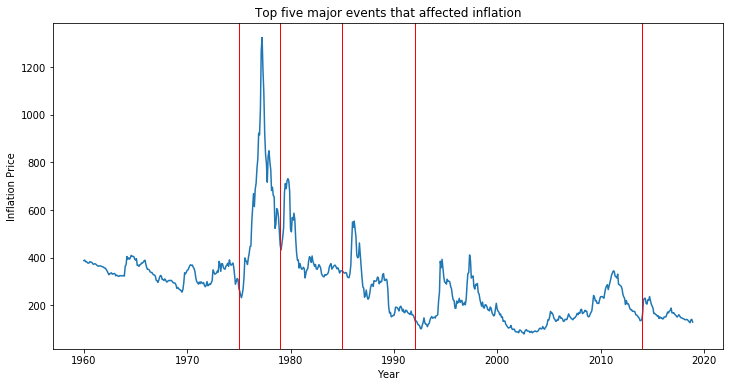

In [4]:
# Looking at possible causes of dramatic changes to price over time in data
explore.events_over_time(df2)

In [5]:
# Look at price distribution per region
explore.show_price(df2)

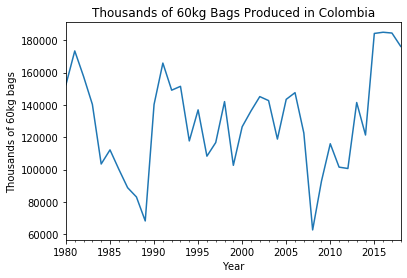

In [6]:
# Production by region 1980-2018
explore.production_graph(df)

Average Precipitation by Region of Colombia


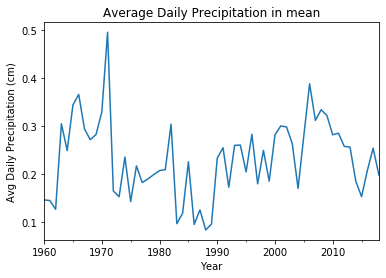

In [7]:
#Precipitation by region
explore.precipitation_by_region(df)

In [8]:
# Average temperature by region
#explore.show_mean_temp(df2)

#### The Observatory of Economic Complexity Data Exploration
After acquisition and preparation of the OEC's data we wanted to explore Colombia's export numbers to other countries and attempt to uncover trends within the data. 
Initially we compared Colombia's exports to Brazil's looking to see if there was any indicators from Brazil's exports that Colombia's production would move in any particular direction. As noticed in the graph below there's not pre-movement indicators from Brazil's production. 

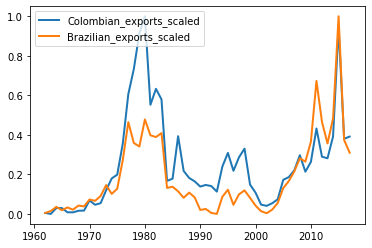

In [9]:
importers.compare_brazil()

## Treemap showing flow between 1962 and 2017 in export flows


#### Correlating Volatility
We wanted to see if the increased volatility of a prior years production numbers would increase volatility of next year's price. TO BE CONTINUED


In [10]:
# price, import_numbers,corr = importers.compare_volitility()
# print(price.head())
# print(import_numbers.head())

AttributeError: module 'importers' has no attribute 'compare_volitility'

In [ ]:
corr

##### Exploratory models




We discovered a noticeable shift in 

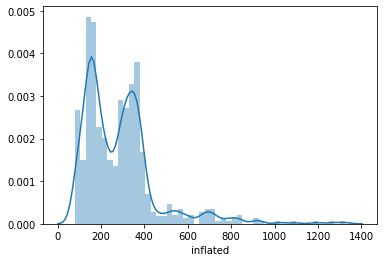

In [11]:
#After reviewing the data distribution we saw that the pricing was bimodal
#Splitting the data for modeling was greatly improved based on this analysis
sns.distplot(df.inflated)

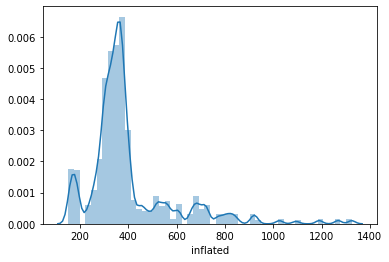

In [12]:
#pre 1991
sns.distplot(df.inflated[:"1991"])

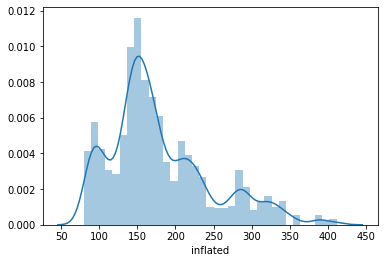

In [13]:
#post 1991
sns.distplot(df.inflated["1991":])

### Model